# Test of the full Hamiltonian variational form on 2site lattice

In [4]:
# 0. Standard imports
import matplotlib.pyplot as plt
import numpy as np
# from qiskit.aqua import Operator
import qutip as qt

# 1. Import the lattice class for generating the lattice with respective boundary conditions.
from lattice import SquareLattice
from lattice.operators.qiskit_aqua_operator_utils import *

# 2. Import the wilson fermion operators, states, hamiltonian
from lattice.wilson_fermions import dirac, build_hamilton

# 3. Set a convenient printing for qiskit.aqua.Operators & Mixed Operators
# def prt_with_output(self):
#     return self.print_operators()
# setattr(Operator, '__repr__', prt_with_output)

In [5]:
from lattice.wilson_fermions.variational_form import WilsonLGT, hopping_term
from lattice.wilson_fermions.states import *

##### Building the Hamiltonian #########


/home/drudis/anaconda3/envs/aqua/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.asarray(arr).astype(np.bool)
/home/drudis/anaconda3/envs/aqua/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr = np.asa

Mass, Hopping & Wilson energy added........
Representation: paulis, qubits: 10, size: 390
Gauge field flux energy added.
Gauge invariance regulator added.
##### Hamiltonian successfully built #####
##### Building the Hamiltonian #########
Mass, Hopping & Wilson energy added........
Quantum object: dims = [[16, 2, 2, 2, 2, 2, 2], [16, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -2.5+0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  2.5+0.j ...  0. +0.j  0. +0.j  0. +0.j]
 ...
 [ 0. +0.j  0. +0.j  0. +0.j ... -2.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  2.5+0.j  0. +0.j]
 [ 0. +0.j  0. +0.j  0. +0.j ...  0. +0.j  0. +0.j  0. +0.j]]
Gauge field flux energy added.
Gauge invariance regulator added.
##### Hamiltonian successfully built #####
Representation: paulis, qubits: 10, size: 305


/home/drudis/anaconda3/envs/aqua/lib/python3.8/site-packages/qiskit/aqua/operators/legacy/weighted_pauli_operator.py:294: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if isinstance(other, (int, float, complex, np.int, np.float, np.complex)):
/home/drudis/anaconda3/envs/aqua/lib/python3.8/site-packages/qiskit/aqua/operators/legacy/weighted_pauli_operator.py:294: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you s

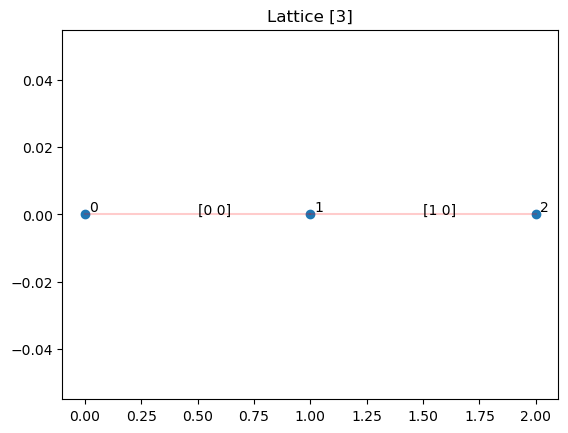

In [6]:
lattice_simplest = SquareLattice([3], bc='closed')

S = 1.
ms = 0.
rep = dirac
params = {
    'm': .5,
    't': 1.,
    'r': 1.,
    'a': 0.5,
    'e': np.sqrt(2),
    'lam': 20.,
    'S': S }

boundary_cond = {
    (0, 0): ms,
    (lattice_simplest.nsites-1, 0): ms
}

#-----------------------------------------------------------------
hamiltonian = build_hamilton(lattice=lattice_simplest, 
                                rep=rep,
                                params=params, 
                                lam = params['lam'],
                                boundary_cond=boundary_cond,
                                output='qiskit')
hamiltonian.chop()

hamilton_qt = build_hamilton(lattice=lattice_simplest, 
                                rep=rep, 
                                params=params, 
                                lam = params['lam'],
                                boundary_cond=boundary_cond,
                                output='qutip')

print(hamiltonian)
lattice_simplest.plot_2d();

In [7]:
if S > 0:
    init_state = qt.tensor([wf.construct_dirac_state('.'*lattice_simplest.nsites), 
                            wf.spin_register_state([ms]*lattice_simplest.nedges, S)][::-1])
else: 
    init_state = wf.construct_dirac_state('.'*lattice_simplest.nsites)

# bare vacuum energy
print('bare vacuum energy')
print(qt.expect(hamilton_qt, init_state))

print('ground state energy (qutip)')
E0, ground_state = hamilton_qt.groundstate()
print(E0)

print('ground state energy (qiskit)')
from qiskit.aqua.algorithms.classical.exact_eigen_solver.exact_eigen_solver import ExactEigensolver
solver = ExactEigensolver(hamiltonian)
gs_solution = solver.run()
print(gs_solution['energies'][0])

NameError: name 'wf' is not defined

In [ ]:
var_form = WilsonLGT(lattice_simplest, S, rep)

## Setting up the variational form:

In [ ]:
def zterm(pos, comp, lattice, S):
    assert 0 <= pos <= lattice.nsites-1, 'pos out of bounds for lattice of size {}'.format(lattice.nsites)
    dim_S = int(2*S+1)
    ops = [qt.identity(2)]*(2*pos+comp) \
            + [qt.sigmaz()]  \
            + [qt.identity(2)]*(2*lattice.nsites - (2*pos+comp) - 1) \
            + [qt.identity(dim_S)]*lattice.nedges
    return qt.tensor(ops[::-1])

In [ ]:
qutip_hoppers = [hopping_term(edge, lattice_simplest, S, rep, output='qutip')
                for edge in lattice_simplest.edges]              

In [ ]:
hopp1 = lambda theta: (1j*theta*qutip_hoppers[0]).expm()
hopp2 = lambda theta: (1j*theta*qutip_hoppers[1]).expm()
z0 = lambda phi: (1j*phi*zterm(0,0, lattice_simplest, S)).expm()
z1 = lambda phi: (1j*phi*zterm(0,1, lattice_simplest, S)).expm()
z2 = lambda phi: (1j*phi*zterm(1,0, lattice_simplest, S)).expm()
z3 = lambda phi: (1j*phi*zterm(1,1, lattice_simplest, S)).expm()
z4 = lambda phi: (1j*phi*zterm(2,0, lattice_simplest, S)).expm()
z5 = lambda phi: (1j*phi*zterm(2,1, lattice_simplest, S)).expm()

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
var_state = lambda lams: var_form._eval_matrix_varform(lams, init_state)

In [ ]:
manual_var_state = lambda lam: z4(lam[0]) * z2(lam[1]) * z0(lam[2]) * hopp2(lam[3]) * hopp1(lam[4]) * init_state

## Try a classical optimization via qutip to see if there are better param. combination 

Result: It seems there are not for the given variational form that is built up only from the kinetic terms in the Hamiltonian.

In [ ]:
from scipy.optimize import minimize

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
#var_state = lambda lam: z0(lam[0]) * z1(lam[1]) * z2(lam[2]) \
#                        * z3(lam[3]) * hopp1(lam[4]) * init_state

energy_expectation = lambda p: qt.expect(hamilton_qt, var_state(p))

### with depth 1

In [ ]:
%%time
Nfeval = 1
init = np.random.rand(var_form._num_parameters)*np.pi
param_list = [init]

def callbackF(Xi):
    global Nfeval
    param_list.append(Xi)
    Nfeval += 1

popt = minimize(fun = energy_expectation, 
                x0 = init, 
                callback = callbackF)
print('fun: \t{}\nnfev: \t{}\nnit: \t{}\nx0: \t{}\nxopt: \t{}\n'.format(popt['fun'],
                                                                           popt['nfev'],
                                                                           popt['nit'],
                                                                           init,
                                                                           popt['x']))

Ediff = (abs(gs_solution['eigvals'] - popt['fun']) / abs(gs_solution['eigvals'])[0])[0]

print('Init energy: \t{}'.format(energy_expectation(init)))
print('GS energy: \t{}'.format(E0))
print('Var energy: \t{}'.format(popt['fun']))
print('relative_diff = {:.3f}%'.format(Ediff*100))

fun: 	-8.13555989163216
nfev: 	459
nit: 	27
x0: 	[2.04907604 1.11518912 2.12885271 0.60318381 2.37456046 2.38844415
 2.91915649]
xopt: 	[ 2.98538976 -0.15814396  0.78539834  0.78539723  0.78539629  2.38844415
  2.91915649]

Init energy: 	2.6832789242427597
GS energy: 	-8.16409446269665
Var energy: 	-8.13555989163216
relative_diff = 0.350%
CPU times: user 6min 19s, sys: 8.2 s, total: 6min 27s
Wall time: 3min 25s


In [ ]:
state_decompose_dirac(var_state(popt['x']), lattice_simplest.nsites, lattice_simplest.nedges, S, thres=0)

([('...', [0.0, 0.0]),
  ('pa.', [1.0, 0.0]),
  ('ap.', [-1.0, 0.0]),
  ('.pa', [0.0, 1.0]),
  ('.ap', [0.0, -1.0]),
  ('bb.', [0.0, 0.0]),
  ('pba', [1.0, 1.0]),
  ('abp', [-1.0, -1.0]),
  ('.bb', [0.0, 0.0])],
 array([9.05536815e-01, 2.30301169e-02, 2.30301169e-02, 2.30300495e-02,
        2.30300495e-02, 5.85714768e-04, 5.85713052e-04, 5.85713052e-04,
        5.85711337e-04]))

In [ ]:
state_decompose_dirac(ground_state, lattice_simplest.nsites, lattice_simplest.nedges, S, thres=0)

([('...', [0.0, 0.0]),
  ('.ap', [0.0, -1.0]),
  ('ap.', [-1.0, 0.0]),
  ('pa.', [1.0, 0.0]),
  ('.pa', [0.0, 1.0]),
  ('a.p', [-1.0, -1.0]),
  ('p.a', [1.0, 1.0]),
  ('bb.', [0.0, 0.0]),
  ('.bb', [0.0, 0.0]),
  ('pba', [1.0, 1.0]),
  ('abp', [-1.0, -1.0]),
  ('bpa', [0.0, 1.0]),
  ('bap', [0.0, -1.0]),
  ('apb', [-1.0, 0.0]),
  ('pab', [1.0, 0.0]),
  ('b.b', [0.0, 0.0])],
 array([8.94041349e-01, 2.46432135e-02, 2.46432135e-02, 2.46432135e-02,
        2.46432135e-02, 1.87410966e-03, 1.87410966e-03, 9.67985228e-04,
        9.67985228e-04, 6.86385996e-04, 6.86385996e-04, 7.94155573e-05,
        7.94155573e-05, 7.94155573e-05, 7.94155573e-05, 1.11732008e-05]))

In [ ]:
Gx = lambda x: wf.gauge_operator(x, lattice_simplest, params, boundary_cond=boundary_cond)
qx = lambda x: site_charge(x, lattice_simplest, S=S).to_qubit_operator(output='qutip')
Qtot= wf.total_charge(lattice_simplest, S=S).to_qubit_operator(output='qutip')
Mtot= wf.total_mass(lattice_simplest, S=S).to_qubit_operator(output='qutip')
reg = wf.gauss_law_regularizer(lattice_simplest, params, lam=100., boundary_cond=boundary_cond)

In [ ]:
# look at the energy as a function of the parameter
param_list = np.array(param_list)

var_states = np.array([var_state(lam) for lam in param_list], dtype=qt.Qobj)

energies = np.array([qt.expect(hamilton_qt, state) for state in var_states])
#left_charge = np.array([qt.expect(qx([0]), state)-1 for state in var_states])
#mid_charge = np.array([qt.expect(qx([1]), state)-1 for state in var_states])
#right_charge = np.array([qt.expect(qx([2]), state)-1 for state in var_states])

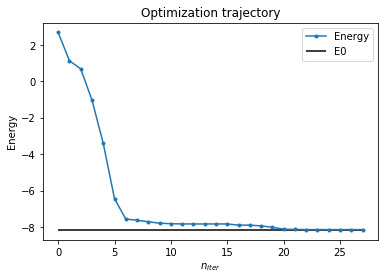

In [ ]:
plt.plot(energies, '.-', label='Energy')
plt.hlines(E0, 0, len(energies)-1, label='E0')
plt.legend()
plt.ylabel('Energy')
plt.title('Optimization trajectory')
plt.xlabel(r'$n_{iter}$');

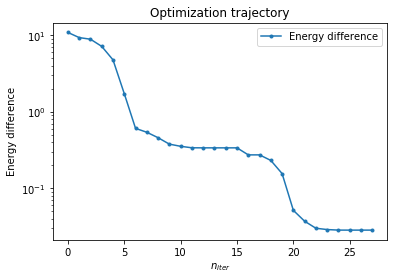

In [ ]:
plt.semilogy(energies-E0, '.-', label='Energy difference')
plt.legend()
plt.ylabel('Energy difference')
plt.title('Optimization trajectory')
plt.xlabel(r'$n_{iter}$');

In [ ]:
# Check that the state var_state is indeed gauge invariant and stays in the gauss law satisfying sector
np.array([qt.expect(reg, state) for state in var_states])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Check that the total charge is conserved throughout the optimization process
np.array([qt.expect(Qtot-lattice_simplest.nsites, state) for state in var_states])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# While the total particle number indeed does not need to be conserved. 
np.array([qt.expect(Mtot, state) + lattice_simplest.nsites for state in var_states])

array([3.83595123, 3.42315575, 3.25847755, 2.76225346, 1.84708943,
       0.3361578 , 0.00491704, 0.05396058, 0.15829538, 0.16723943,
       0.07852139, 0.10776649, 0.10428709, 0.1043961 , 0.10430909,
       0.10420619, 0.08427861, 0.08422666, 0.08612411, 0.09722609,
       0.14516601, 0.17276797, 0.19404988, 0.19573634, 0.19412905,
       0.19362058, 0.19360608, 0.19361207])

In [ ]:
gs_overlap = np.array([ground_state.overlap(state) for state in var_states])

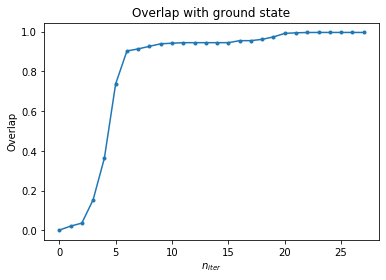

In [ ]:
plt.plot(abs(gs_overlap)**2, '.-')
plt.ylabel('Overlap')
plt.xlabel(r'$n_{iter}$');
plt.title('Overlap with ground state');

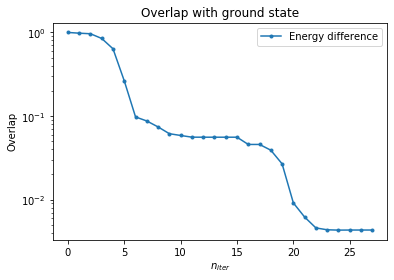

In [ ]:
plt.semilogy(1.-abs(gs_overlap)**2, '.-', label='Energy difference')
plt.legend()
plt.ylabel('Overlap')
plt.xlabel(r'$n_{iter}$');
plt.title('Overlap with ground state');

## with depth 2

In [ ]:
# set up the variational state
#var_state = lambda lam1, lam2: hopp2(lam2) * hopp1(lam1) * init_state
var_state2 = lambda lam: z0(lam[0]) * z1(lam[1]) * z2(lam[2]) \
                        * z3(lam[3]) * hopp1(lam[4]) \
                        * z0(lam[5]) * z1(lam[6]) * z2(lam[7]) \
                        * z3(lam[8]) * hopp1(lam[9]) * init_state

energy_expectation2 = lambda p: qt.expect(hamilton_qt, var_state(p))

In [ ]:
%%time
Nfeval = 1
param_list = [init]
init2 = np.random.rand(10)*np.pi

def callbackF(Xi):
    global Nfeval
    param_list.append(Xi)
    Nfeval += 1

popt2 = minimize(fun = energy_expectation2, 
                x0 = init2, 
                callback = callbackF)
print('fun: \t{}\nnfev: \t{}\nnit: \t{}\nx0: \t{}\nxopt: \t{}\n'.format(popt2['fun'],
                                                                           popt2['nfev'],
                                                                           popt2['nit'],
                                                                           init2,
                                                                           popt2['x']))

Ediff2 = (abs(gs_solution['eigvals'] - popt['fun']) / abs(gs_solution['eigvals'])[0])[0]

print('Init energy: \t{}'.format(energy_expectation2(init2)))
print('GS energy: \t{}'.format(E0))
print('Var energy: \t{}'.format(popt2['fun']))
print('relative_diff = {:.3f}%'.format(Ediff2*100))

fun: 	-8.135559891635832
nfev: 	384
nit: 	23
x0: 	[2.85396612 0.51894168 1.82022004 1.55448294 0.3325848  0.91161127
 2.66205771 0.56237699 0.51964418 0.18733735]
xopt: 	[ 2.98538996 -0.158144    3.92699081  0.78539811  0.78539809  0.91161127
  2.66205771  0.56237699  0.51964418  0.18733735]

Init energy: 	-3.2101331743320514
GS energy: 	-8.16409446269665
Var energy: 	-8.135559891635832
relative_diff = 0.350%
CPU times: user 5min 28s, sys: 7.41 s, total: 5min 35s
Wall time: 3min 3s
